In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import IPython.display 
from IPython.display import Image


In [2]:
from IPython.core.display import display, HTML 
display(HTML('<style>.container { width:99.9% !important; }<\style>'))

# set column number to see all columns
pd.set_option('display.max_columns', 35)

# Problem Statement 

### Part 1: PCA



The ‘Hair Salon.csv’  dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do a Principal Component Analysis for this case study according to the instructions given in the rubric. Kindly refer to the PCA_Data_Dictionary.jpg  file for the Data Dictionary of the Dataset.  

### Note: This particular dataset contains the target variable satisfaction as well. Please do drop this variable before doing Principal Component Analysis.

### PCA Data Dictionary

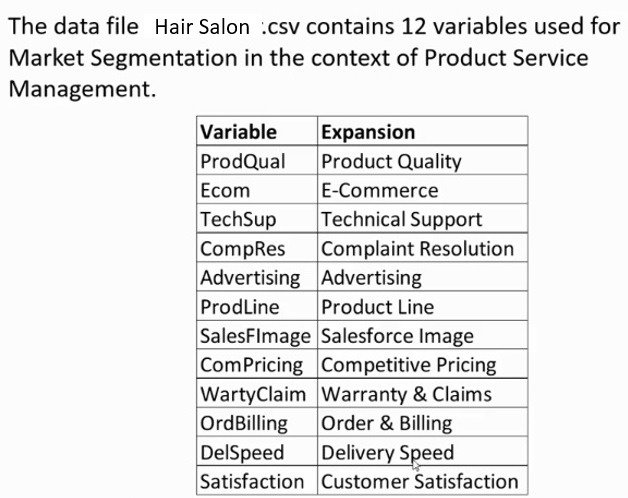

In [3]:
Image("C:\\Users\\Matrix\\Documents\\Jupyter\\PCA_Data_Dictionary.jpg")

### Let us now load the data and check the first 10 rows of the dataframe

In [4]:
df=pd.read_csv("Factor-Hair-Revised .csv")

In [5]:
df.head(10)

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1
5,6,6.5,2.8,3.1,4.1,4.0,4.3,3.7,8.5,5.1,3.6,3.3,4.7
6,7,6.9,3.7,5.0,2.6,2.1,2.3,5.4,8.9,4.8,2.1,2.0,5.7
7,8,6.2,3.3,3.9,4.8,4.6,3.6,5.1,6.9,5.4,4.3,3.7,6.3
8,9,5.8,3.6,5.1,6.7,3.7,5.9,5.8,9.3,5.9,4.4,4.6,7.0
9,10,6.4,4.5,5.1,6.1,4.7,5.7,5.7,8.4,5.4,4.1,4.4,5.5


In [6]:
df.shape

(100, 13)

In [7]:
df.columns

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [9]:
df.isnull().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

In [10]:
df.duplicated(subset="ID").sum()

0

### Removing the 'ID' colummn

In [11]:
df.drop(labels='ID',axis=1,inplace=True)
df.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1
OrdBilling,100.0,4.278,0.928840,2.0,3.700,4.40,4.800,6.7


### 1.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

### Univariate Analysis 

In [13]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], kde=False, color='r');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [14]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

12

### Description of Variables,Histogram and Boxplot

Description of ProdQual
----------------------------------------------------------------------------
count    100.000000
mean       7.810000
std        1.396279
min        5.000000
25%        6.575000
50%        8.000000
75%        9.100000
max       10.000000
Name: ProdQual, dtype: float64 Distribution of ProdQual
----------------------------------------------------------------------------


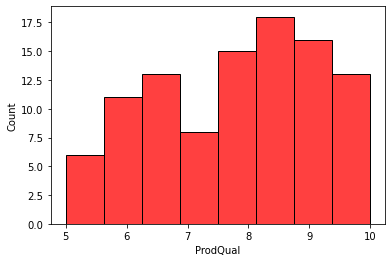

BoxPlot of ProdQual
----------------------------------------------------------------------------


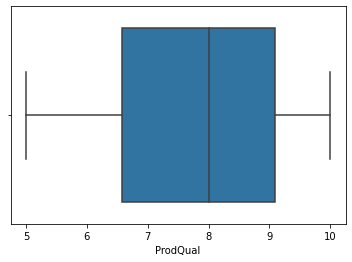

Description of Ecom
----------------------------------------------------------------------------
count    100.000000
mean       3.672000
std        0.700516
min        2.200000
25%        3.275000
50%        3.600000
75%        3.925000
max        5.700000
Name: Ecom, dtype: float64 Distribution of Ecom
----------------------------------------------------------------------------


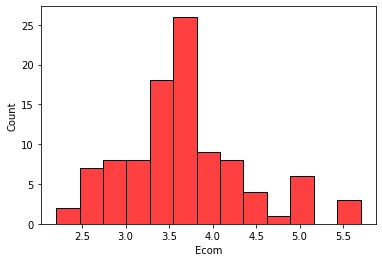

BoxPlot of Ecom
----------------------------------------------------------------------------


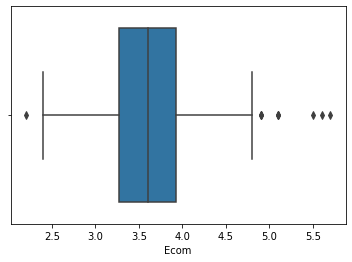

Description of TechSup
----------------------------------------------------------------------------
count    100.000000
mean       5.365000
std        1.530457
min        1.300000
25%        4.250000
50%        5.400000
75%        6.625000
max        8.500000
Name: TechSup, dtype: float64 Distribution of TechSup
----------------------------------------------------------------------------


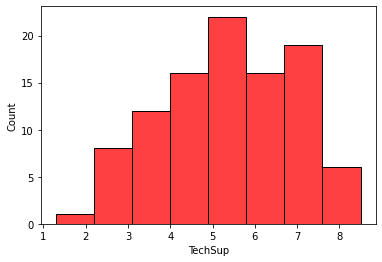

BoxPlot of TechSup
----------------------------------------------------------------------------


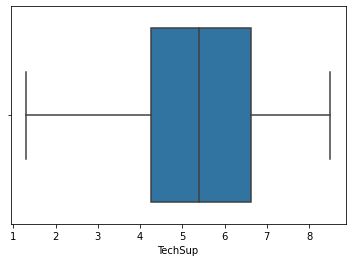

Description of CompRes
----------------------------------------------------------------------------
count    100.000000
mean       5.442000
std        1.208403
min        2.600000
25%        4.600000
50%        5.450000
75%        6.325000
max        7.800000
Name: CompRes, dtype: float64 Distribution of CompRes
----------------------------------------------------------------------------


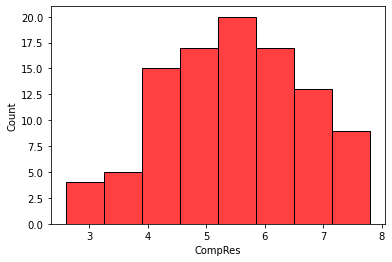

BoxPlot of CompRes
----------------------------------------------------------------------------


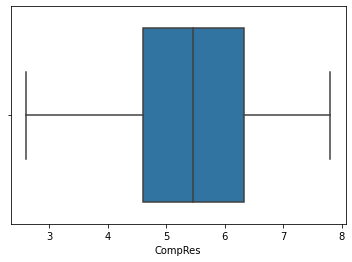

Description of Advertising
----------------------------------------------------------------------------
count    100.000000
mean       4.010000
std        1.126943
min        1.900000
25%        3.175000
50%        4.000000
75%        4.800000
max        6.500000
Name: Advertising, dtype: float64 Distribution of Advertising
----------------------------------------------------------------------------


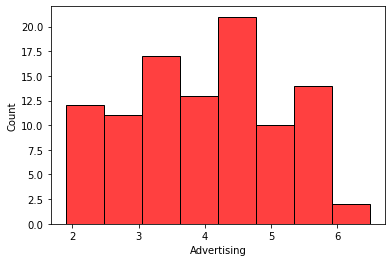

BoxPlot of Advertising
----------------------------------------------------------------------------


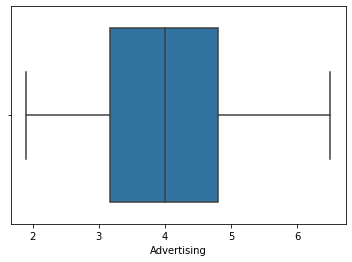

Description of ProdLine
----------------------------------------------------------------------------
count    100.000000
mean       5.805000
std        1.315285
min        2.300000
25%        4.700000
50%        5.750000
75%        6.800000
max        8.400000
Name: ProdLine, dtype: float64 Distribution of ProdLine
----------------------------------------------------------------------------


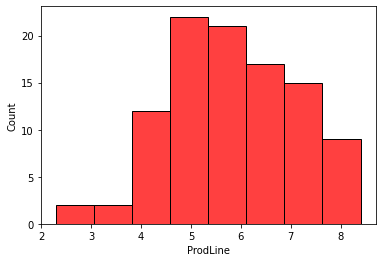

BoxPlot of ProdLine
----------------------------------------------------------------------------


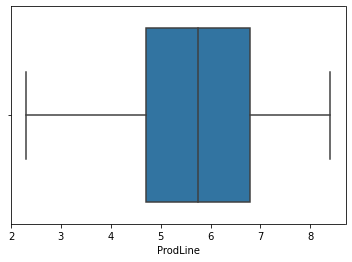

Description of SalesFImage
----------------------------------------------------------------------------
count    100.00000
mean       5.12300
std        1.07232
min        2.90000
25%        4.50000
50%        4.90000
75%        5.80000
max        8.20000
Name: SalesFImage, dtype: float64 Distribution of SalesFImage
----------------------------------------------------------------------------


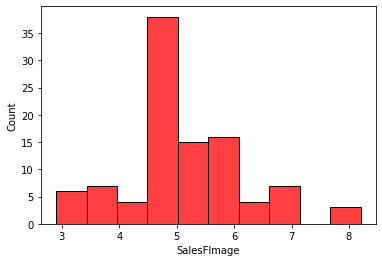

BoxPlot of SalesFImage
----------------------------------------------------------------------------


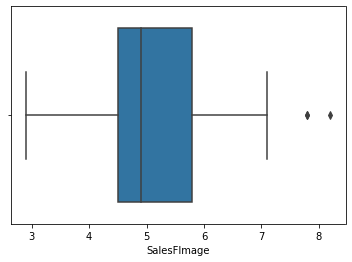

Description of ComPricing
----------------------------------------------------------------------------
count    100.000000
mean       6.974000
std        1.545055
min        3.700000
25%        5.875000
50%        7.100000
75%        8.400000
max        9.900000
Name: ComPricing, dtype: float64 Distribution of ComPricing
----------------------------------------------------------------------------


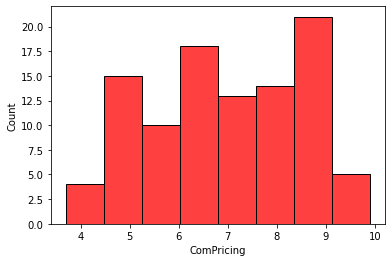

BoxPlot of ComPricing
----------------------------------------------------------------------------


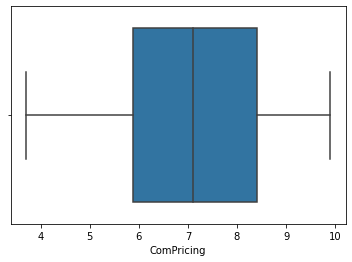

Description of WartyClaim
----------------------------------------------------------------------------
count    100.000000
mean       6.043000
std        0.819738
min        4.100000
25%        5.400000
50%        6.100000
75%        6.600000
max        8.100000
Name: WartyClaim, dtype: float64 Distribution of WartyClaim
----------------------------------------------------------------------------


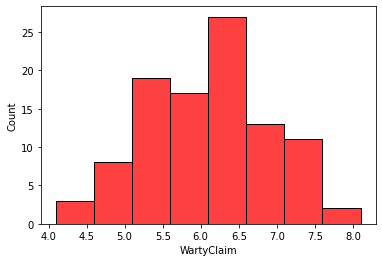

BoxPlot of WartyClaim
----------------------------------------------------------------------------


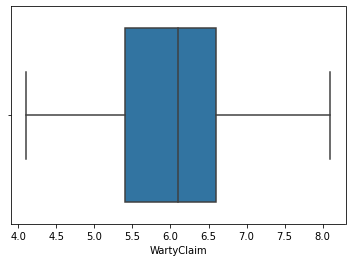

Description of OrdBilling
----------------------------------------------------------------------------
count    100.00000
mean       4.27800
std        0.92884
min        2.00000
25%        3.70000
50%        4.40000
75%        4.80000
max        6.70000
Name: OrdBilling, dtype: float64 Distribution of OrdBilling
----------------------------------------------------------------------------


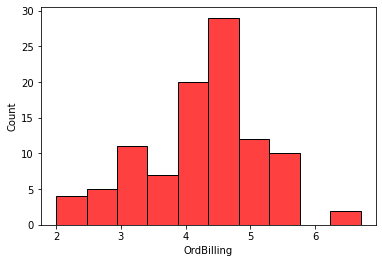

BoxPlot of OrdBilling
----------------------------------------------------------------------------


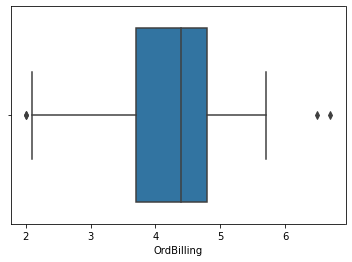

Description of DelSpeed
----------------------------------------------------------------------------
count    100.000000
mean       3.886000
std        0.734437
min        1.600000
25%        3.400000
50%        3.900000
75%        4.425000
max        5.500000
Name: DelSpeed, dtype: float64 Distribution of DelSpeed
----------------------------------------------------------------------------


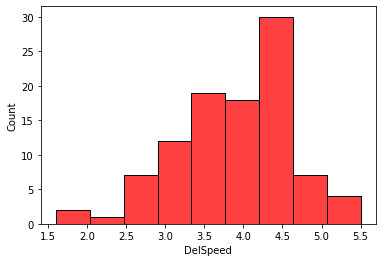

BoxPlot of DelSpeed
----------------------------------------------------------------------------


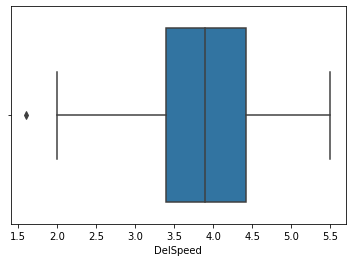

Description of Satisfaction
----------------------------------------------------------------------------
count    100.000000
mean       6.918000
std        1.191839
min        4.700000
25%        6.000000
50%        7.050000
75%        7.625000
max        9.900000
Name: Satisfaction, dtype: float64 Distribution of Satisfaction
----------------------------------------------------------------------------


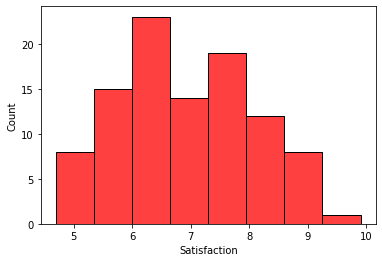

BoxPlot of Satisfaction
----------------------------------------------------------------------------


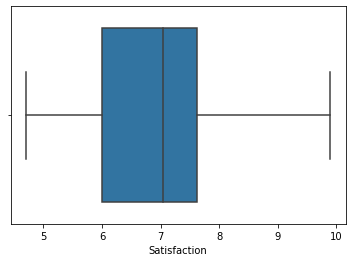

In [15]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,10)

### Multivariate Analysis

### Pairplot 

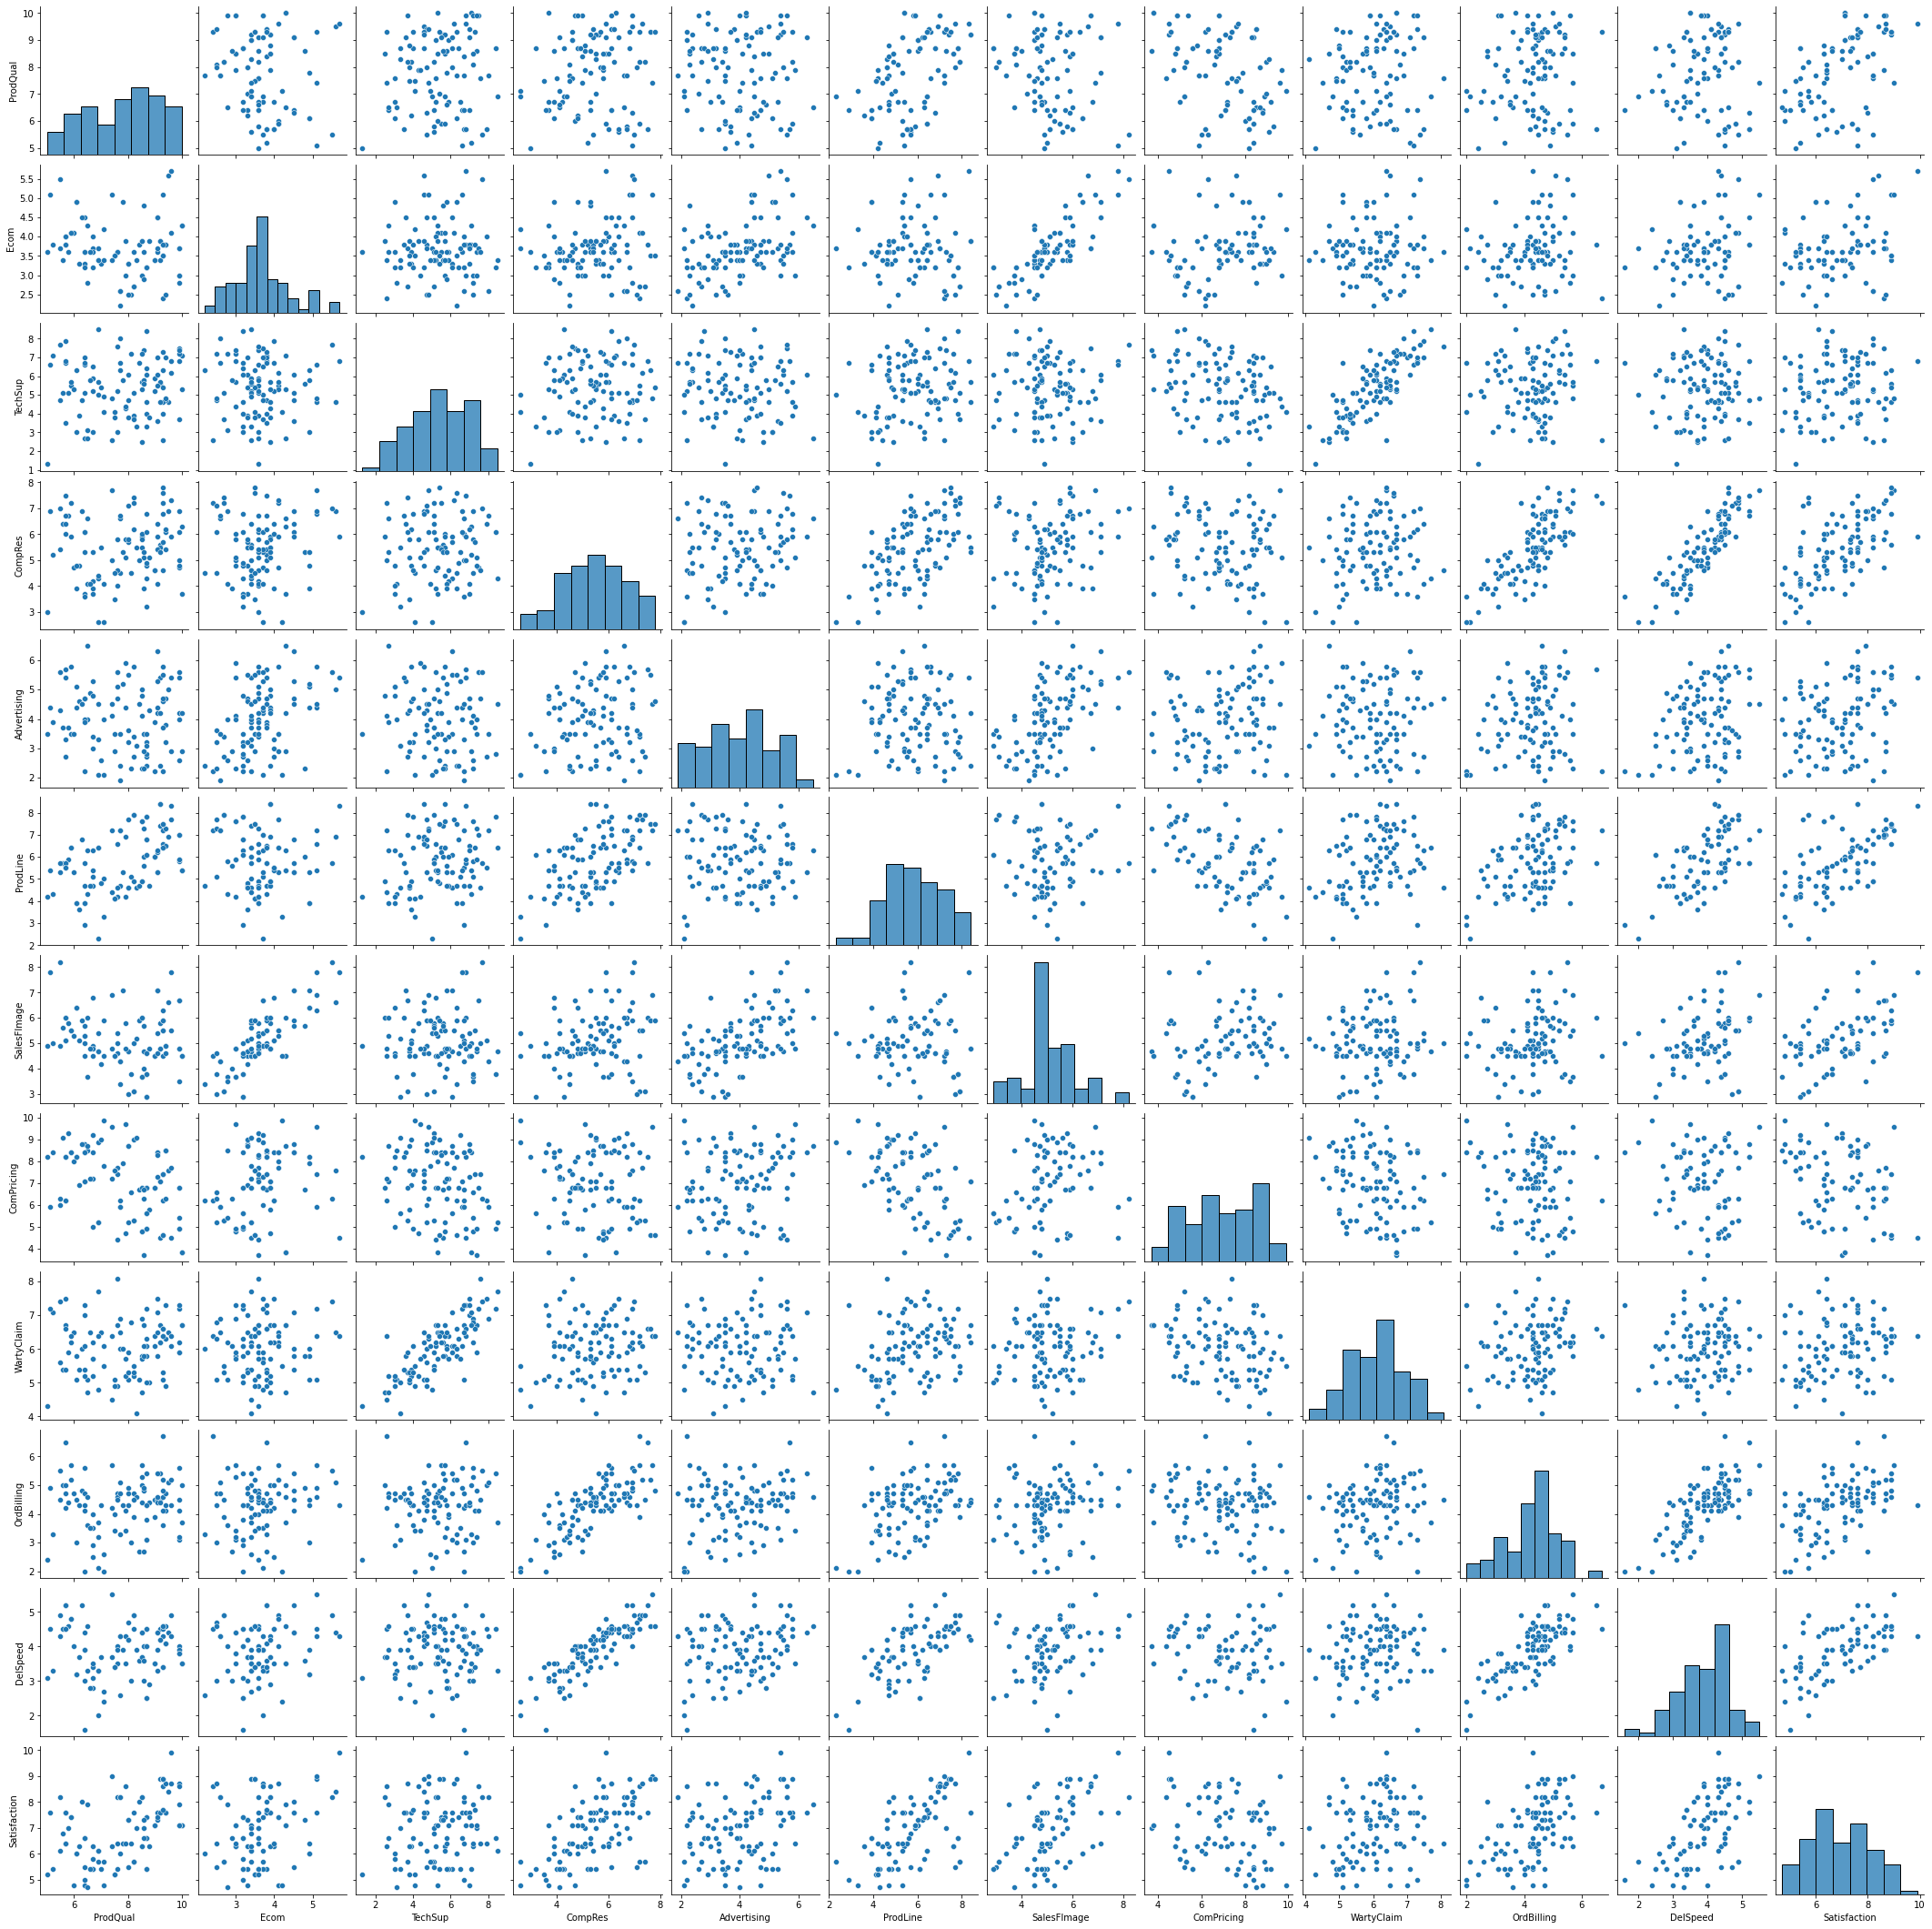

In [16]:
sns.pairplot(df)

### Heatmap

In [17]:
corr = df.corr()
corr

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003,0.521732


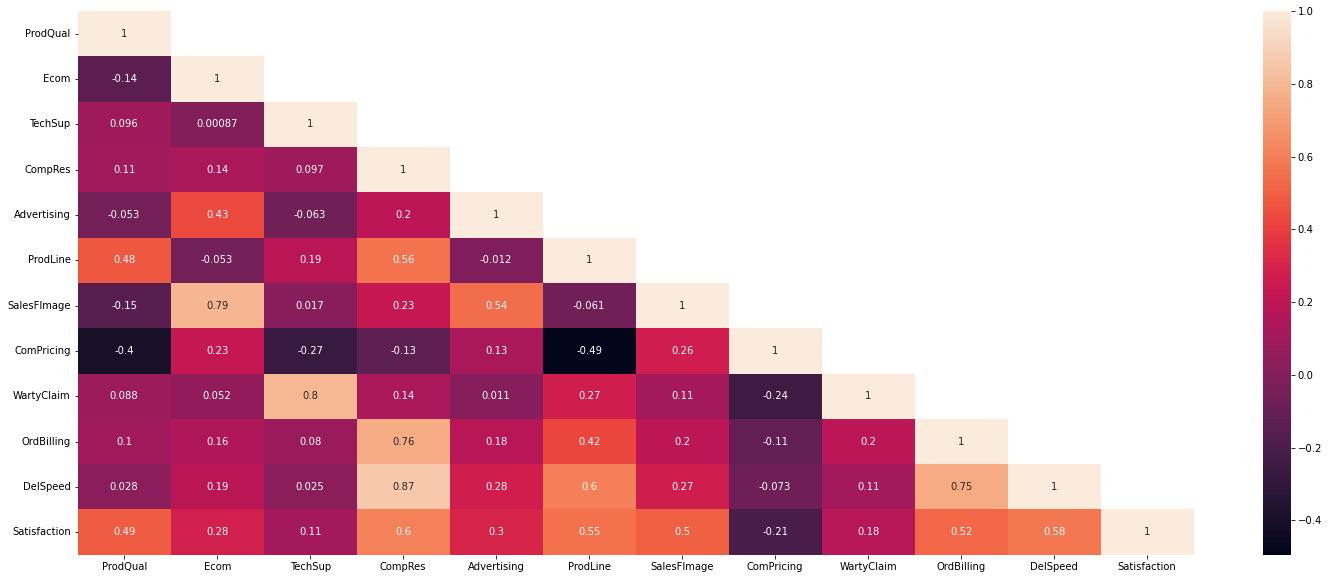

In [18]:
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot = True,mask= np.triu(corr,+1));

### 1.2 Scale the variables and write the inference for using the type of scaling function for this case study.

In [19]:
# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here
#  In this scenario Scaling is done only because of covariance perspective

Scaling  the data using z-score using scipy.stats library

- The main reason for scaling data using the z-score is to ensure that all features (variables) are on a similar scale.

- When features are on different scales, it can cause certain variables to dominate the learning process, leading to biased results.

- The z-score scaling method transforms the values of each feature to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the feature from each value and dividing by the standard deviation. The resulting standardized values have a mean of 0 and a standard deviation of 1, making them comparable across features.

In [20]:
from scipy.stats import zscore

In [21]:
data_scaled = df.apply(zscore)
data_scaled

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531,1.081067
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605,-1.027098
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226,1.671354
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443,-1.786038
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220,0.153474
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.568640,1.618353,0.154322,-0.118102,-1.525024,0.149004,0.540797,-0.178233,-0.297929,0.673026,-0.391376,0.322128
96,-0.295117,-0.390241,-1.815752,-0.367615,0.080264,-1.073591,-0.302734,0.147010,-1.891791,-0.084399,-0.254531,-0.521139
97,0.640619,-0.677183,-1.356068,-1.864688,-0.811562,0.225416,-2.083519,-0.893769,-1.278767,-1.274638,-1.896667,-1.280078
98,-0.007198,1.761824,0.285661,-0.118102,1.061274,-0.385881,1.852955,0.602351,-0.052720,0.023805,0.019158,-0.436812


### 1.3 Comment on the comparison between covariance and the correlation matrix after scaling.

#### Covariance matrix

In [22]:
data_scaled.cov()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.010101,-0.138549,0.096566,0.107444,-0.054013,0.482317,-0.153346,-0.405335,0.089204,0.105357,0.027998,0.491237
Ecom,-0.138549,1.010101,0.000876,0.141595,0.434233,-0.053220,0.799539,0.231780,0.052422,0.157725,0.193572,0.285601
TechSup,0.096566,0.000876,1.010101,0.097633,-0.063505,0.194571,0.017162,-0.273522,0.805220,0.080911,0.025698,0.113735
CompRes,0.107444,0.141595,0.097633,1.010101,0.198906,0.567088,0.232072,-0.129247,0.141827,0.764514,0.873830,0.609356
Advertising,-0.054013,0.434233,-0.063505,0.198906,1.010101,-0.011667,0.547680,0.135573,0.010901,0.186097,0.278650,0.307747
ProdLine,0.482317,-0.053220,0.194571,0.567088,-0.011667,1.010101,-0.061935,-0.499948,0.275836,0.428695,0.607930,0.556107
SalesFImage,-0.153346,0.799539,0.017162,0.232072,0.547680,-0.061935,1.010101,0.267269,0.108541,0.197098,0.274294,0.505258
ComPricing,-0.405335,0.231780,-0.273522,-0.129247,0.135573,-0.499948,0.267269,1.010101,-0.247461,-0.115724,-0.073608,-0.210400
WartyClaim,0.089204,0.052422,0.805220,0.141827,0.010901,0.275836,0.108541,-0.247461,1.010101,0.199056,0.110500,0.179338
OrdBilling,0.105357,0.157725,0.080911,0.764514,0.186097,0.428695,0.197098,-0.115724,0.199056,1.010101,0.758589,0.527002


#### Correlation  matrix

In [23]:
data_scaled.corr()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ProdQual,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545
OrdBilling,0.104303,0.156147,0.080102,0.756869,0.184236,0.424408,0.195127,-0.114567,0.197065,1.000000,0.751003,0.521732


Comparing the two matrices, we can see that the values in the correlation matrix are very similar to those in the covariance matrix. This is because correlation is derived from covariance by dividing each covariance value by the product of the standard deviations of the two variables. Therefore, the correlation matrix provides a standardized view of the relationships, allowing for easier interpretation and comparison across variables.

In summary, while the covariance matrix provides information about the strength and direction of relationships between variables, the correlation matrix provides a standardized measure of the linear relationships, making it more convenient for analysis and interpretation.


### 1.4 Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1
OrdBilling,100.0,4.278,0.928840,2.0,3.700,4.40,4.800,6.7


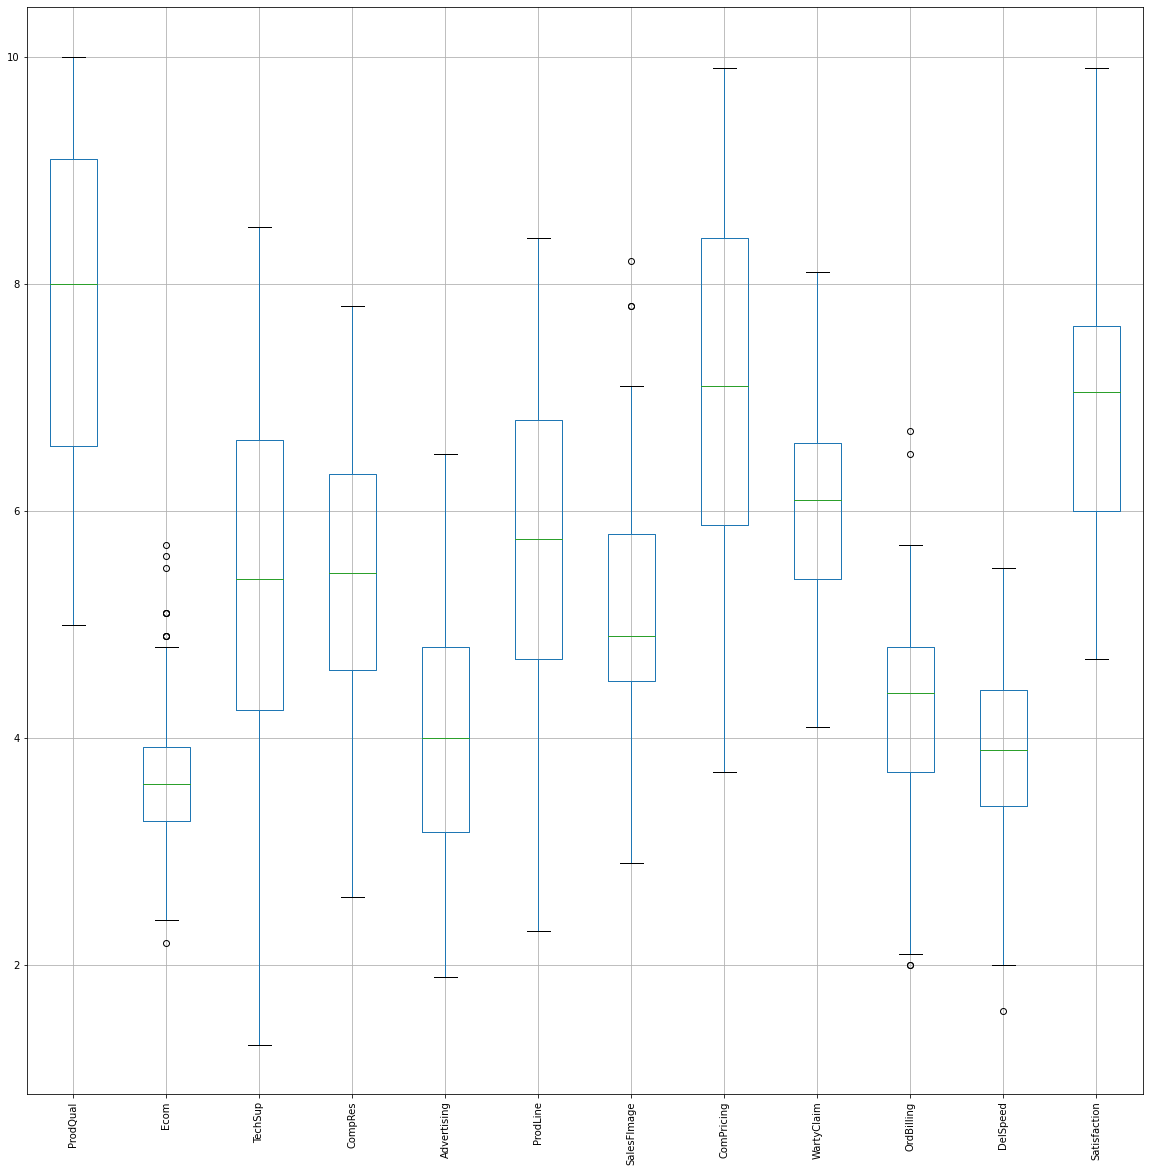

In [25]:
df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [26]:
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdQual,100.0,8.744394e-16,1.005038,-2.022630,-0.888949,0.136761,0.928538,1.576356
Ecom,100.0,1.020295e-15,1.005038,-2.111893,-0.569580,-0.103299,0.362982,2.909592
TechSup,100.0,1.015854e-15,1.005038,-2.669451,-0.732211,0.022984,0.827431,2.058728
CompRes,100.0,-1.343370e-16,1.005038,-2.363712,-0.700298,0.006654,0.734398,1.961166
Advertising,100.0,-5.884182e-16,1.005038,-1.881755,-0.744675,-0.008918,0.704543,2.220649
ProdLine,100.0,2.353673e-16,1.005038,-2.678246,-0.844354,-0.042027,0.760301,1.982896
SalesFImage,100.0,6.156187e-16,1.005038,-2.083519,-0.583910,-0.209008,0.634522,2.883936
ComPricing,100.0,-7.016610e-16,1.005038,-2.129693,-0.714885,0.081961,0.927594,1.903324
WartyClaim,100.0,-1.274536e-15,1.005038,-2.382210,-0.788348,0.069885,0.682908,2.521979
OrdBilling,100.0,4.440892e-16,1.005038,-2.464877,-0.625417,0.132008,0.564823,2.620690


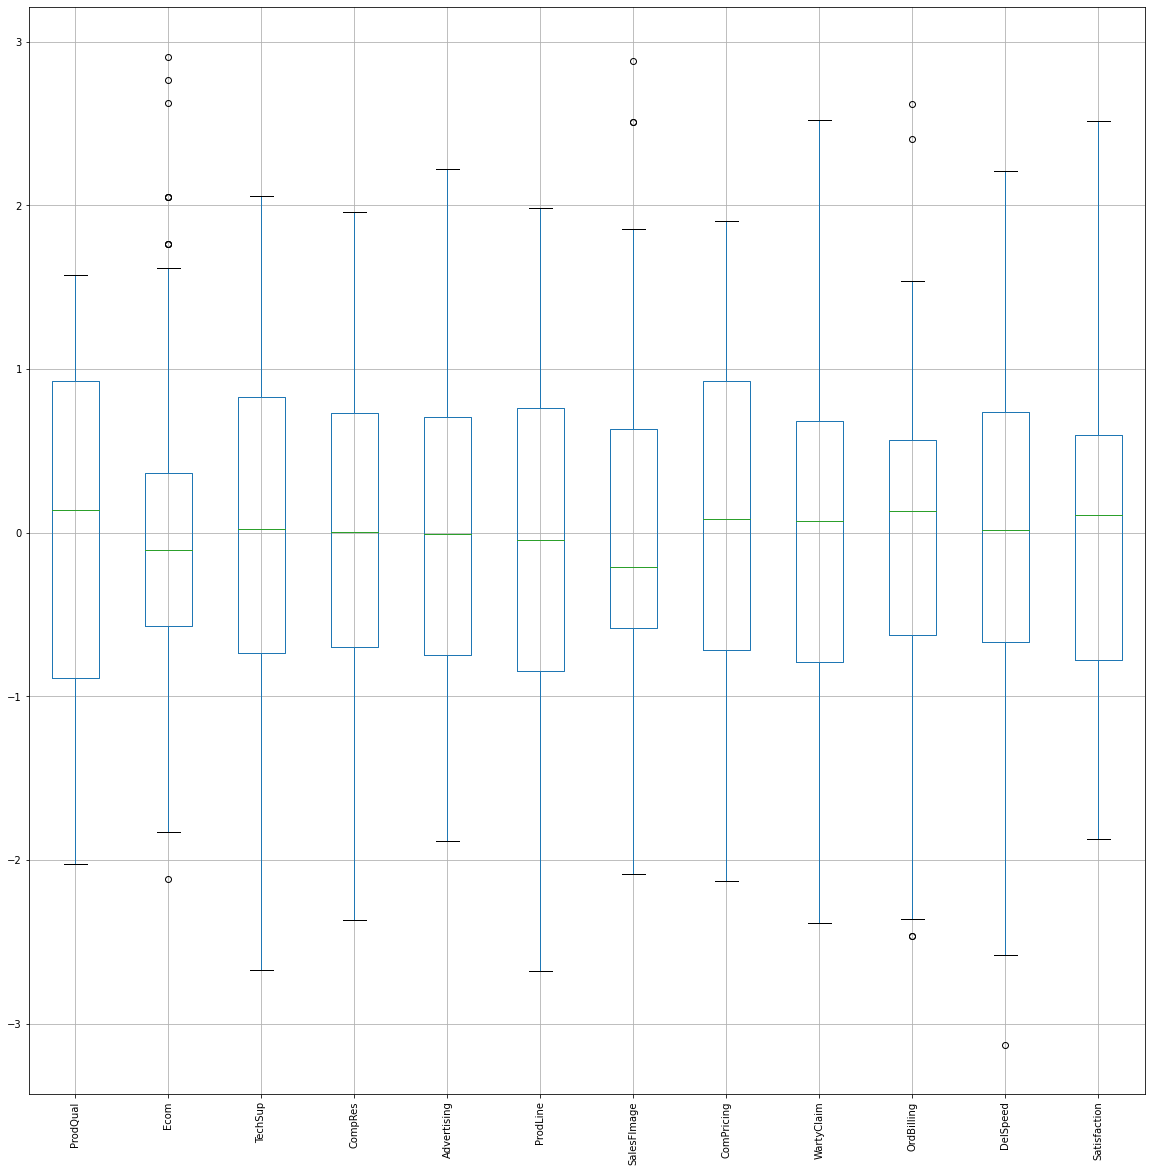

In [27]:
data_scaled.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

The outliers are still present in the dataset.
Reason : scaling does not remove outliers scaling scales the values on a Z score distribuiion,
In this case we do not need to treat outliers as they all are on same scale and all values are under 10.

### 1.5  Build the covariance matrix, eigenvalues and eigenvector.


We will be dropping the Dependant variable in this data set which is "Satisfaction"

In [28]:
data_scaled.drop(labels=["Satisfaction"],axis =1,inplace=True)
data_scaled.head()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
0,0.496660,0.327114,-1.881421,0.380922,0.704543,-0.691530,0.821973,-0.113185,-1.646582,0.781230,-0.254531
1,0.280721,-1.394538,-0.174023,1.462141,-0.544014,1.600835,-1.896068,-1.088915,-0.665744,-0.409009,1.387605
2,1.000518,-0.390241,0.154322,0.131410,1.239639,1.218774,0.634522,-1.609304,0.192489,1.214044,0.840226
3,-1.014914,-0.533712,1.073690,-1.448834,0.615361,-0.844354,-0.583910,1.187789,1.173327,0.023805,-1.212443
4,0.856559,-0.390241,-0.108354,-0.700298,-1.614207,0.149004,-0.583910,-0.113185,0.069885,0.240212,-0.528220


### Covariance matrix

In [29]:
data_scaled.cov()

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.010101,-0.138549,0.096566,0.107444,-0.054013,0.482317,-0.153346,-0.405335,0.089204,0.105357,0.027998
Ecom,-0.138549,1.010101,0.000876,0.141595,0.434233,-0.053220,0.799539,0.231780,0.052422,0.157725,0.193572
TechSup,0.096566,0.000876,1.010101,0.097633,-0.063505,0.194571,0.017162,-0.273522,0.805220,0.080911,0.025698
CompRes,0.107444,0.141595,0.097633,1.010101,0.198906,0.567088,0.232072,-0.129247,0.141827,0.764514,0.873830
Advertising,-0.054013,0.434233,-0.063505,0.198906,1.010101,-0.011667,0.547680,0.135573,0.010901,0.186097,0.278650
ProdLine,0.482317,-0.053220,0.194571,0.567088,-0.011667,1.010101,-0.061935,-0.499948,0.275836,0.428695,0.607930
SalesFImage,-0.153346,0.799539,0.017162,0.232072,0.547680,-0.061935,1.010101,0.267269,0.108541,0.197098,0.274294
ComPricing,-0.405335,0.231780,-0.273522,-0.129247,0.135573,-0.499948,0.267269,1.010101,-0.247461,-0.115724,-0.073608
WartyClaim,0.089204,0.052422,0.805220,0.141827,0.010901,0.275836,0.108541,-0.247461,1.010101,0.199056,0.110500
OrdBilling,0.105357,0.157725,0.080911,0.764514,0.186097,0.428695,0.197098,-0.115724,0.199056,1.010101,0.758589


In [30]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition  import PCA 

In [31]:
pca= PCA()
pca.fit_transform(data_scaled)


array([[ 0.0795508 ,  1.54319843,  1.89504643, ...,  0.44484537,
         0.03867319, -0.33948838],
       [-1.10096634, -2.42029823,  2.04552113, ..., -0.40787741,
         0.46637257,  0.21361315],
       [-2.19706653, -0.72744044,  0.16680026, ...,  0.38871416,
        -0.81054552,  0.08570392],
       ...,
       [ 3.19577568, -1.86292048,  1.29747695, ..., -0.69044976,
         0.13343324, -0.31962405],
       [-0.62088819,  2.34984871, -1.12785588, ..., -0.08262926,
        -0.26297433, -0.01658993],
       [ 1.63523181,  1.25986453,  0.40255069, ...,  0.17869371,
         0.37326589, -0.01321407]])

### Eigen Vectors

In [32]:
print('Eigen Vectors \n')
evec= pd.DataFrame(pca.components_,columns= data_scaled.columns).T
evec

Eigen Vectors 



,0,1,2,3,4,5,6,7,8,9,10
ProdQual,-0.133790,-0.313498,0.062272,0.643136,0.231666,-0.564570,0.191641,0.135473,0.031328,0.066597,0.182792
Ecom,-0.165953,0.446509,-0.235248,0.272380,0.422288,0.263257,0.059626,-0.122026,-0.542511,0.281558,0.062339
TechSup,-0.157693,-0.230967,-0.610951,-0.193393,-0.023957,-0.108769,-0.017200,0.464710,-0.359300,-0.388171,-0.051930
CompRes,-0.470684,0.019444,0.210351,-0.206320,0.028657,-0.028152,-0.008500,0.513398,0.093248,0.534672,-0.362534
Advertising,-0.183735,0.363665,-0.088097,0.317894,-0.803870,-0.200569,-0.063070,-0.053477,-0.154682,0.037158,-0.081187
ProdLine,-0.386765,-0.284781,0.116279,0.202902,0.116674,0.098195,-0.608148,-0.333207,-0.084155,-0.234798,-0.385078
SalesFImage,-0.203670,0.470696,-0.241342,0.222177,0.204373,0.104972,0.001437,0.169107,0.644899,-0.353412,-0.084699
ComPricing,0.151689,0.413457,0.053045,-0.333543,0.248926,-0.709736,-0.308249,-0.098832,-0.094144,-0.045182,-0.102958
WartyClaim,-0.212934,-0.191672,-0.598564,-0.185302,-0.032927,-0.139840,-0.030640,-0.443540,0.317566,0.435348,0.128932
OrdBilling,-0.437218,0.026399,0.168930,-0.236854,0.026754,-0.119480,0.659320,-0.366018,-0.099073,-0.303865,-0.194151


### Eigen Values

In [33]:
print("Eigen Values \n")
pca.explained_variance_

Eigen Values 



array([3.4615872 , 2.57666335, 1.70805705, 1.09753137, 0.61557989,
       0.55745836, 0.40557389, 0.249446  , 0.20560936, 0.13418341,
       0.09942123])

### 1.6 Write the explicit form of the first PC (in terms of Eigen Vectors).

In [34]:
for i in evec.columns:
    pc_score = np.dot(evec[i],data_scaled.iloc[0])
    print(round(pc_score,6),end=" ")

0.079551 1.543198 1.895046 1.168119 -0.113909 0.086364 1.181148 0.119288 0.444845 0.038673 -0.339488 

In [35]:
evec.iloc[:,0]

ProdQual      -0.133790
Ecom          -0.165953
TechSup       -0.157693
CompRes       -0.470684
Advertising   -0.183735
ProdLine      -0.386765
SalesFImage   -0.203670
ComPricing     0.151689
WartyClaim    -0.212934
OrdBilling    -0.437218
DelSpeed      -0.473089
Name: 0, dtype: float64

In [36]:
len(evec.iloc[:,0])

11

In [37]:
for i in range(len(evec.iloc[:,0])):
    for j in range(len(evec.index)):
        if i ==j:
            print(evec.iloc[i,0].round(3),'x',evec.index[j])

-0.134 x ProdQual
-0.166 x Ecom
-0.158 x TechSup
-0.471 x CompRes
-0.184 x Advertising
-0.387 x ProdLine
-0.204 x SalesFImage
0.152 x ComPricing
-0.213 x WartyClaim
-0.437 x OrdBilling
-0.473 x DelSpeed


### 1.7 Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [38]:
print('The variance explained by each of eigen values in order is \n')
var_exp = pca.explained_variance_ratio_*100
var_exp

The variance explained by each of eigen values in order is 



array([31.1542848 , 23.18997011, 15.37251341,  9.87778233,  5.54021904,
        5.01712525,  3.65016497,  2.24501404,  1.85048425,  1.2076507 ,
        0.89479108])

In [39]:
print ('Cumulative variance explained \n')
var = (np.cumsum(pca.explained_variance_ratio_)*100).round(3)
print(var)

Cumulative variance explained 

[ 31.154  54.344  69.717  79.595  85.135  90.152  93.802  96.047  97.898
  99.105 100.   ]


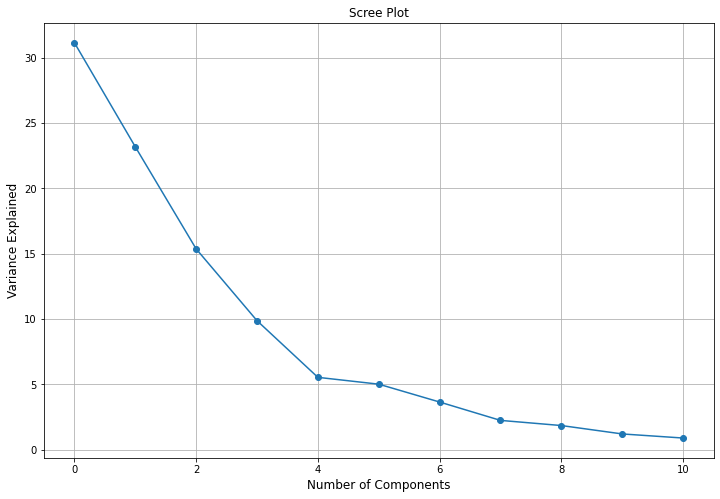

In [40]:
plt.figure(figsize=(12,8))
plt.plot(var_exp,marker='o')
plt.xlabel('Number of Components',fontsize=12)
plt.ylabel('Variance Explained',fontsize=12)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [41]:
print('From the above plot we can see that number of components that we can take is 5. \n'
     "we also see that if we take 5 components the total amount of  variance explained is", var[4], '%' )

From the above plot we can see that number of components that we can take is 5. 
we also see that if we take 5 components the total amount of  variance explained is 85.135 %


In [42]:
pca = PCA(n_components=5)
data_reduced = pca.fit_transform(data_scaled)

In [43]:
data_reduced.shape

(100, 5)

In [44]:
pd.DataFrame(data_reduced).head()

,0,1,2,3,4
0,0.079551,1.543198,1.895046,1.168119,-0.113909
1,-1.100966,-2.420298,2.045521,-0.427083,-0.550453
2,-2.197067,-0.727440,0.166800,1.310312,-1.061797
3,1.562933,0.171366,-1.827179,-1.192240,-0.939629
4,0.767570,-1.428111,0.234356,0.069525,1.206498


<AxesSubplot:>

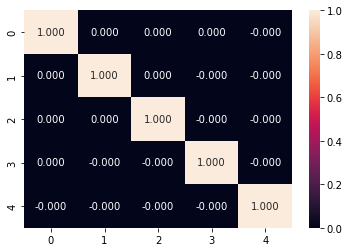

In [45]:
sns.heatmap(pd.DataFrame(data_reduced).corr(),annot=True,fmt=('0.3f'))

There is no more corelation in PC's

In [46]:
df_comp = pd.DataFrame(pca.components_.T,index= list(data_scaled),columns = ['PC1','PC2','PC3','PC4','PC5'])
df_comp

,PC1,PC2,PC3,PC4,PC5
ProdQual,-0.133790,-0.313498,0.062272,0.643136,0.231666
Ecom,-0.165953,0.446509,-0.235248,0.272380,0.422288
TechSup,-0.157693,-0.230967,-0.610951,-0.193393,-0.023957
CompRes,-0.470684,0.019444,0.210351,-0.206320,0.028657
Advertising,-0.183735,0.363665,-0.088097,0.317894,-0.803870
ProdLine,-0.386765,-0.284781,0.116279,0.202902,0.116674
SalesFImage,-0.203670,0.470696,-0.241342,0.222177,0.204373
ComPricing,0.151689,0.413457,0.053045,-0.333543,0.248926
WartyClaim,-0.212934,-0.191672,-0.598564,-0.185302,-0.032927
OrdBilling,-0.437218,0.026399,0.168930,-0.236854,0.026754


### 1.8 Mention the business implication of using the Principal Component Analysis for this case study.

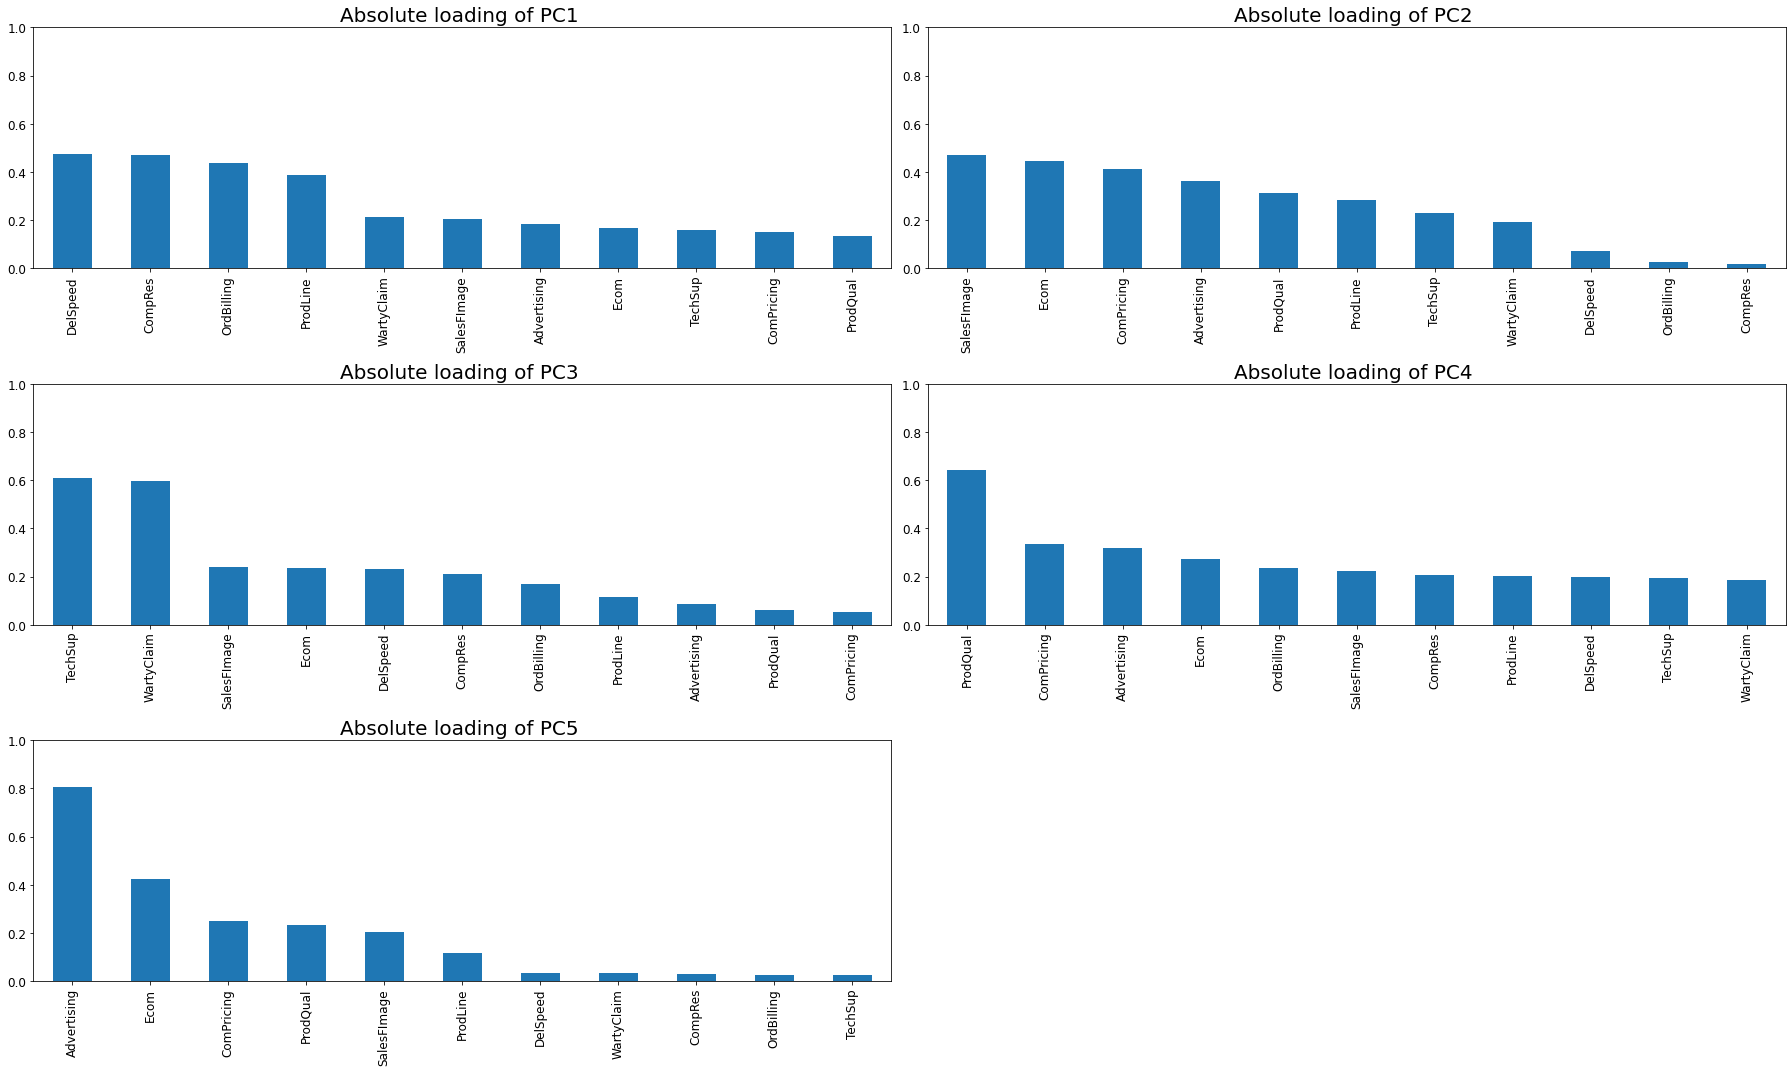

In [47]:
plt.figure(figsize=(25,15))
for i in range(len(df_comp.columns)):
    plt.subplot(3,2,i+1)
    abs(df_comp[df_comp.columns[i]]).T.sort_values(ascending =False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2),fontsize =12)
    plt.xticks(fontsize=12)
    plt.title("Absolute loading of {} ".format(df_comp.columns[i]),fontsize=20)
    plt.tight_layout()

 Principal components with explained variance meaning 
PC1 -31.1542848 ,
PC2- 23.18997011,
PC3- 15.37251341,
PC4- 9.87778233, 
PC5- 5.54021904


The higher the percentage, the more significant the contribution of that principal component to the overall variance in the data.
The "explained variance" refers to the proportion of the total variance in the dataset that is accounted for by each principal component. It indicates how much information or variability in the data is captured by that particular component.

### Part 2 : Clustering 

The  State_wise_Health_income.csv  dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.


### Data Dictionary for Clustering State_wise_Health_income Dataset:

1. States: names of States
2. Health_indeces1: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in the State.
3. Health_indeces2: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in certain areas of the State.
4. Per_capita_income-Per capita income (PCI) measures the average income earned per person in a given area (city, region, country, etc.) in a specified year. It is calculated by dividing the area's total income by its total population.
5. GDP: GDP provides an economic snapshot of a country/state, used to estimate the size of an economy and its growth rate.


### 2.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc, etc)

### Let us now load the data and check the first 10 rows of the dataframe

In [48]:
dfstate = pd.read_csv('State_wise_Health_income.csv')
dfstate.head(10)

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22
5,5,Bogolin,69,14,527,73
6,6,Bogoroditsa,307,69,707,1724
7,7,Buchino,10219,1508,7049,449003
8,8,Budiltsi,744,115,809,7497
9,9,Cherniche,2975,857,1600,153299


As we dont need ID column and States columns which is  the categorical data we can drop these two variables from the data set.

In [49]:
dfstate = dfstate.drop(['Unnamed: 0','States'],axis =1)
dfstate.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,417,66,564,1823
1,1485,646,2710,73662
2,654,299,1104,27318
3,192,25,573,250
4,43,8,528,22


In [50]:
dfstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Health_indeces1    297 non-null    int64
 1   Health_indices2    297 non-null    int64
 2   Per_capita_income  297 non-null    int64
 3   GDP                297 non-null    int64
dtypes: int64(4)
memory usage: 9.4 KB


In [51]:
dfstate.shape

(297, 4)

In [52]:
dfstate.describe().T

,count,mean,std,min,25%,50%,75%,max
Health_indeces1,297.0,2630.151515,2038.505431,-10.0,641.0,2451.0,4094.0,10219.0
Health_indices2,297.0,693.632997,468.944354,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2156.915825,1491.854058,500.0,751.0,1865.0,3137.0,7049.0
GDP,297.0,174601.117845,167167.992863,22.0,8721.0,137173.0,313092.0,728575.0


In [53]:
 dfstate.dtypes

Health_indeces1      int64
Health_indices2      int64
Per_capita_income    int64
GDP                  int64
dtype: object

In [54]:
dfstate.isnull().sum()

Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

### Univariate Analysis 

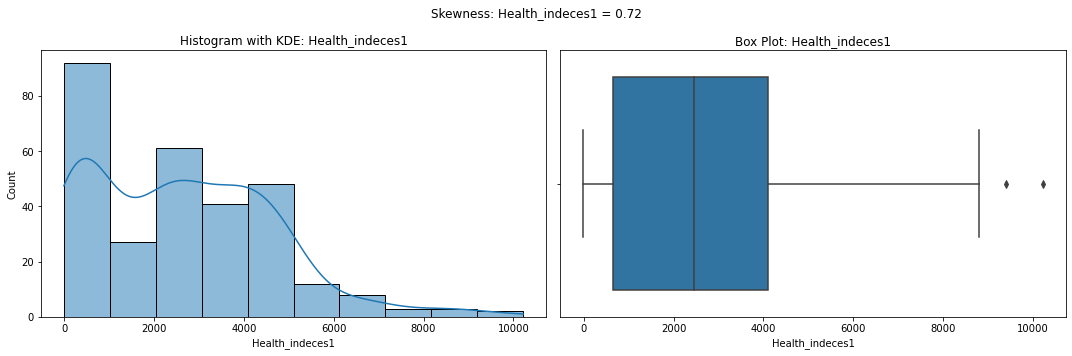

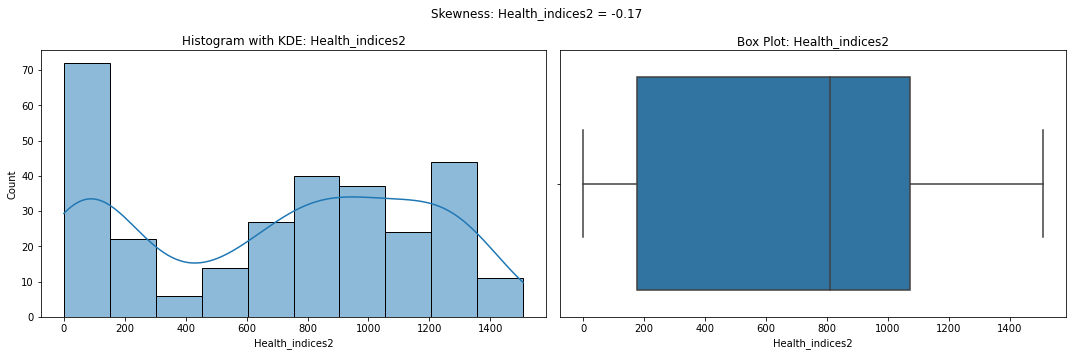

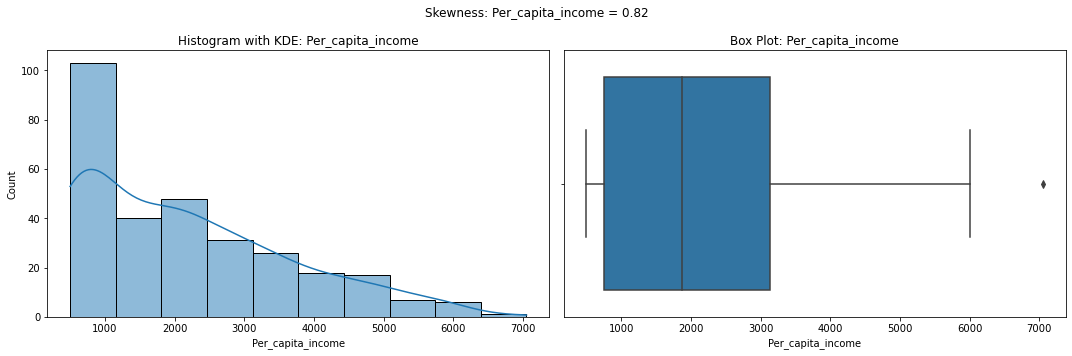

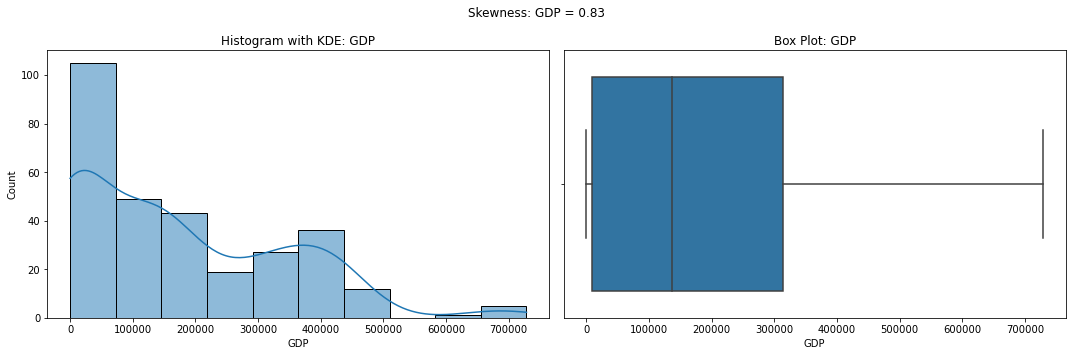

In [55]:
variable_names = dfstate.columns.tolist()
for var in variable_names:
    skewness = dfstate[var].skew()
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot histogram with KDE
    sns.histplot(x=dfstate[var], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram with KDE: {var}')
    
    # Plot box plot
    sns.boxplot(x=dfstate[var], ax=axes[1])
    axes[1].set_title(f'Box Plot: {var}')
    
    # Display skewness information
    plt.suptitle(f'Skewness: {var} = {skewness:.2f}')
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Display the plot
    plt.show()

### Multivariate Analysis

### Pairplot

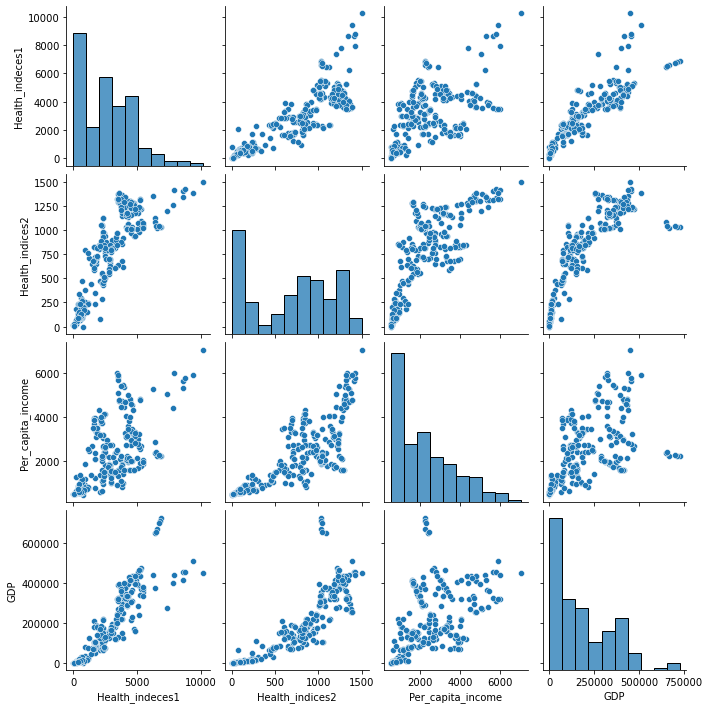

In [56]:

sns.pairplot(dfstate);

In [57]:
dfsc = dfstate.corr()
dfsc

,Health_indeces1,Health_indices2,Per_capita_income,GDP
Health_indeces1,1.000000,0.866403,0.668632,0.906999
Health_indices2,0.866403,1.000000,0.811553,0.869385
Per_capita_income,0.668632,0.811553,1.000000,0.629395
GDP,0.906999,0.869385,0.629395,1.000000


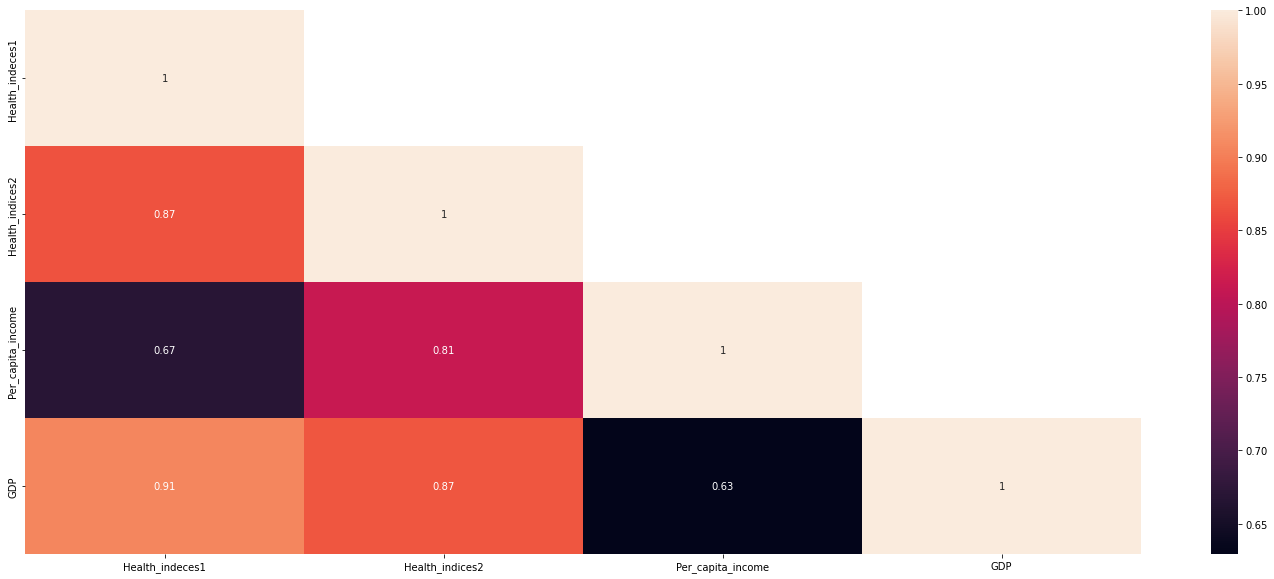

In [58]:
plt.figure(figsize=(25,10))
sns.heatmap(dfsc,annot = True,mask= np.triu(dfsc,+1));


### 2.2. Do you think scaling is necessary for clustering in this case? Justify

Yes, scaling is necessary for clustering algorithms like K-means. Before feeding the data to the algorithm, it is important to perform feature scaling. Clustering techniques, such as K-means, rely on the calculation of distances, typically using Euclidean distance. Scaling the data is beneficial when the attributes have different units of measurement.

In the given dataset, the attributes have different units of measurement, such as weights. Scaling the data will create a common space where the data will have a relative range. One common scaling technique is z-score scaling, where the mean is set to 0 and the standard deviation is set to 1. This scaling method ensures that the data is centered around zero and has a standard deviation of 1.

In [59]:
scaled_data = dfstate.apply(zscore)
scaled_data.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.087506,-1.340654,-1.069544,-1.035304
1,-0.562708,-0.101746,0.371362,-0.604838
2,-0.971048,-0.842955,-0.706968,-0.882536
3,-1.198067,-1.428232,-1.063502,-1.044730
4,-1.271283,-1.464545,-1.093716,-1.046096


### 2.3. Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

In [60]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram , linkage

### Applying  hierarchical clustering to the scaled data using Euclidean distance and 'Ward's' linkage method.

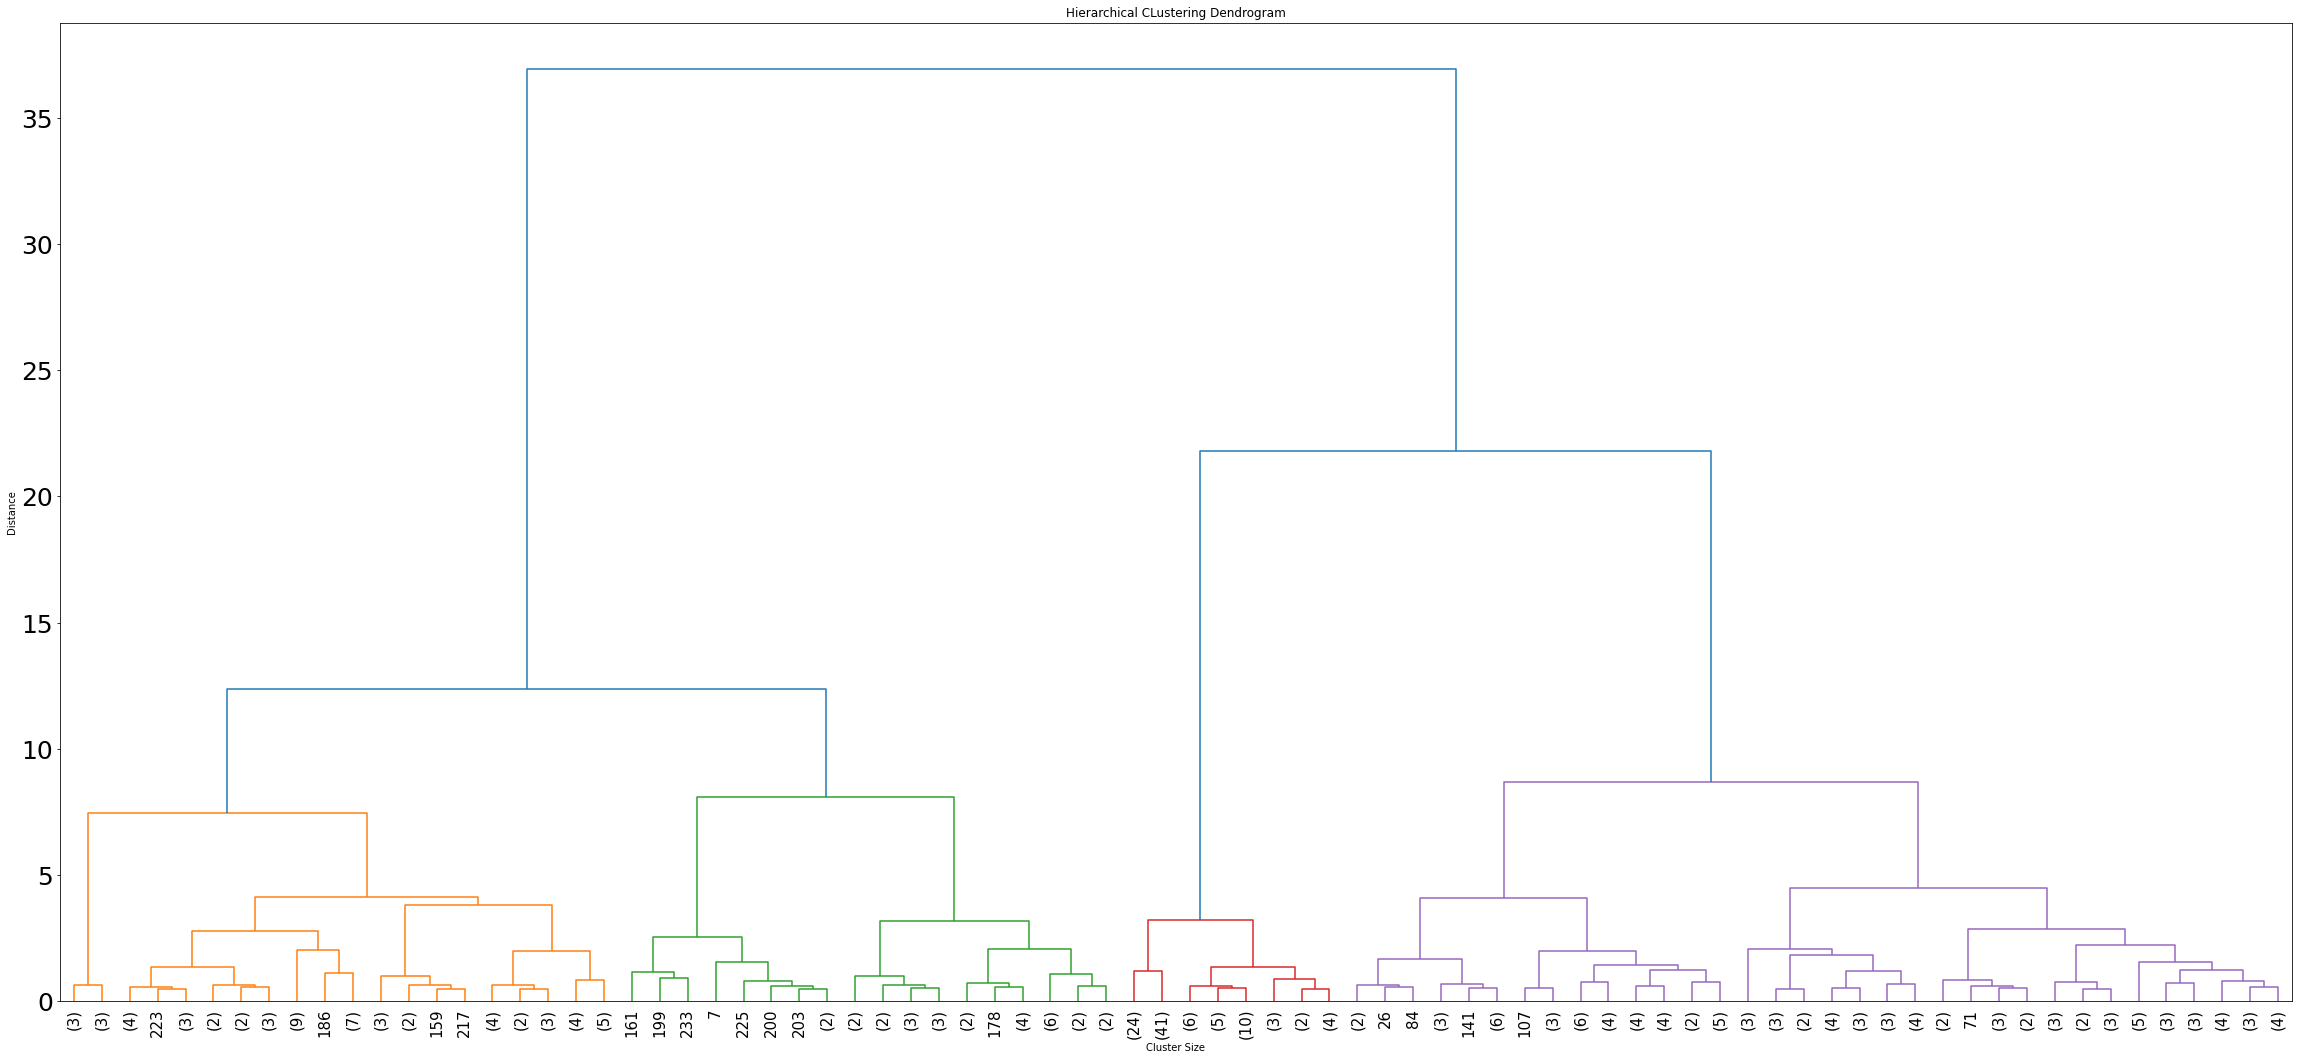

In [61]:
plt.figure(figsize=(40,18))
Z_final = linkage(scaled_data, "ward", metric="euclidean")
plt.title('Hierarchical CLustering Dendrogram')
plt.xlabel("Cluster Size")
plt.xticks(fontsize=45)
plt.ylabel('Distance')
plt.yticks(fontsize=25)
dendrogram(Z_final,truncate_mode="lastp", p =80, leaf_rotation= 90, leaf_font_size=15, color_threshold =10)
plt.show()

Government would like know more than “good” and “not so good” states and hence more insight we are able to generate with more than 2 clusters, better it is for the business. Hence let’s consider 4 clusters and plot the clusters to confirm if the derived clusters are providing the required segmentation details.

Agglomerative : This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy

Initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until 1/ K clusters are formed.

The main advantage is that we don’t need to specify the number of clusters.


In [62]:
#Method 1

clusters_1 = shc.fcluster(shc.linkage(scaled_data, method='ward'), 4, criterion='maxclust')# Here 4 is number of clusters we want
clusters_1

array([3, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 4, 3,
       3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 1, 3, 3, 1, 4, 3, 4, 3, 3, 4, 4,
       4, 3, 3, 1, 3, 3, 3, 4, 3, 1, 3, 4, 4, 3, 3, 4, 4, 3, 3, 1, 4, 3,
       4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3,
       3, 1, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 2, 3, 4, 3, 4, 4, 3, 3,
       3, 2, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 4, 3, 3, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 1, 3, 4, 3, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int3

In [63]:
## Method 2

clusters_2 = shc.fcluster(shc.linkage(scaled_data, method='ward'),10 , criterion='distance')# here 10 is the value of color_threshold in the dendrogram
clusters_2

array([3, 4, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 4, 3,
       3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 1, 3, 3, 1, 4, 3, 4, 3, 3, 4, 4,
       4, 3, 3, 1, 3, 3, 3, 4, 3, 1, 3, 4, 4, 3, 3, 4, 4, 3, 3, 1, 4, 3,
       4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3,
       3, 1, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 2, 3, 4, 3, 4, 4, 3, 3,
       3, 2, 4, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 2, 3, 4, 3, 3, 4, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 1, 3, 4, 3, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int3

### Profiling  these clusters derived from Hierarchical clustering with respect to the means of each variables used in clustering

In [64]:
dfstate['cluster_1']= clusters_1
dfstate['cluster_2']= clusters_2
dfstate.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP,cluster_1,cluster_2
0,417,66,564,1823,3,3
1,1485,646,2710,73662,4,4
2,654,299,1104,27318,3,3
3,192,25,573,250,3,3
4,43,8,528,22,3,3


In [65]:
df1 = dfstate.drop(['cluster_2'],axis=1)
df_clust_1 = df1.groupby('cluster_1').mean()
cluster_1_freq = dfstate['cluster_1'].value_counts().sort_index()
df_clust_1['cluster count'] = cluster_1_freq
df_clust_1

,Health_indeces1,Health_indices2,Per_capita_income,GDP,cluster count
cluster_1,,,,,
1,4796.174603,1129.936508,2419.746032,382809.936508,63
2,5146.444444,1327.138889,5047.083333,367196.916667,36
3,401.063158,104.536842,680.673684,5388.768421,95
4,2481.776699,748.689320,2347.582524,136004.699029,103


In [66]:
df2 = dfstate.drop(['cluster_1'],axis=1)
df_clust_2 = df2.groupby('cluster_2').mean()
cluster_2_freq = dfstate['cluster_2'].value_counts().sort_index()
df_clust_2['cluster count'] = cluster_2_freq
df_clust_2

,Health_indeces1,Health_indices2,Per_capita_income,GDP,cluster count
cluster_2,,,,,
1,4796.174603,1129.936508,2419.746032,382809.936508,63
2,5146.444444,1327.138889,5047.083333,367196.916667,36
3,401.063158,104.536842,680.673684,5388.768421,95
4,2481.776699,748.689320,2347.582524,136004.699029,103


### 2.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply the elbow curve and find the silhouette score.

In [67]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters= i, random_state=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

In [68]:
for i in range(2,11):
    print('The WSS value for',i,"clusters is",wcss[i-2])

The WSS value for 2 clusters is 471.3102140867779
The WSS value for 3 clusters is 260.57294083762304
The WSS value for 4 clusters is 183.60983976801256
The WSS value for 5 clusters is 149.787873629525
The WSS value for 6 clusters is 117.22814675910658
The WSS value for 7 clusters is 90.68967995596347
The WSS value for 8 clusters is 79.79633768915954
The WSS value for 9 clusters is 71.06763708986425
The WSS value for 10 clusters is 63.82360381946683


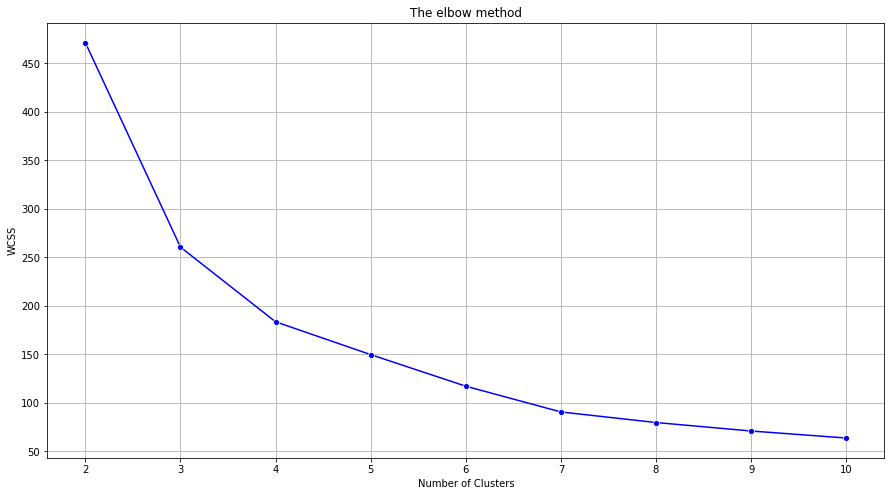

In [69]:
plt.figure(figsize=(15,8))
sns.lineplot(range(2,11),wcss,marker ='o',color="blue")
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

K-means clustering technique was used along with elbow curve to define the optimum clusters for this data set. 3 or 4 clusters were defined a an optimum number.

Creating 4 clusters and adding them to the data set

In [70]:
k_means = KMeans(n_clusters=4, random_state= 10)
k_means.fit(scaled_data)
labels4 = k_means.labels_
labels4

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 3, 1, 1, 3, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1,
       1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 0, 3, 3, 3,
       3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0,
       3, 0, 0, 3, 0, 0, 3, 3, 3, 2, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3,
       0, 0, 0, 3, 0, 0, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3,
       3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

lets try 3 clusters now : 

In [71]:
k_means = KMeans(n_clusters=3, random_state= 10)
k_means.fit(scaled_data)
labels3 = k_means.labels_
labels3

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1,
       1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
from sklearn.metrics import silhouette_score

silhouette_score for labels3

In [73]:
silhouette_score(scaled_data,labels=labels3)


0.5335432108748761

silhouette_score for labels4

In [74]:
silhouette_score(scaled_data,labels=labels4)

0.5520464132164321

### As per the silhouette score Label 4 is slightly better than label 3 

In [75]:
dfstate

,Health_indeces1,Health_indices2,Per_capita_income,GDP,cluster_1,cluster_2
0,417,66,564,1823,3,3
1,1485,646,2710,73662,4,4
2,654,299,1104,27318,3,3
3,192,25,573,250,3,3
4,43,8,528,22,3,3
...,...,...,...,...,...,...
292,3443,970,2499,238636,4,4
293,2963,793,1257,162831,4,4
294,3276,609,1522,120184,4,4
295,3463,847,934,199403,4,4


### 2.5 Describe cluster profiles for the clusters defined. Recommend different priority-based actions that need to be taken for different clusters on the bases of their vulnerability situations according to their Economic and Health Conditions.

In [76]:
dfstate['kmeans_cluster_4']= labels4
dfstate['kmeans_cluster_3']= labels3
dfstate.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP,cluster_1,cluster_2,kmeans_cluster_4,kmeans_cluster_3
0,417,66,564,1823,3,3,1,1
1,1485,646,2710,73662,4,4,2,2
2,654,299,1104,27318,3,3,1,1
3,192,25,573,250,3,3,1,1
4,43,8,528,22,3,3,1,1


In [77]:
df_kmeans_3 = dfstate.drop(['cluster_1','cluster_2','kmeans_cluster_4'],axis=1)
df_kclust_3 = df_kmeans_3.groupby('kmeans_cluster_3').mean()
cluster_3_freq = dfstate['kmeans_cluster_3'].value_counts().sort_index()
df_kclust_3['cluster count'] = cluster_3_freq
df_kclust_3


,Health_indeces1,Health_indices2,Per_capita_income,GDP,cluster count
kmeans_cluster_3,,,,,
0,4930.884211,1212.336842,3385.852632,385648.589474,95
1,499.158416,116.356436,693.772277,9428.099010,101
2,2597.089109,783.019802,2464.128713,141264.138614,101


In [78]:
df_kmeans_4 = dfstate.drop(['cluster_1','cluster_2','kmeans_cluster_3'],axis=1)
df_kclust_4 = df_kmeans_4.groupby('kmeans_cluster_4').mean()
cluster_4_freq = dfstate['kmeans_cluster_4'].value_counts().sort_index()
df_kclust_4['cluster count'] = cluster_4_freq
df_kclust_4

,Health_indeces1,Health_indices2,Per_capita_income,GDP,cluster count
kmeans_cluster_4,,,,,
0,5146.444444,1327.138889,5047.083333,367196.916667,36
1,499.158416,116.356436,693.772277,9428.099010,101
2,2597.089109,783.019802,2464.128713,141264.138614,101
3,4799.355932,1142.288136,2372.220339,396907.237288,59
